# Statistik Deskriptif

Setiap kelompok data numerik mempunyai properti tersendiri yang menjelaskan secara unik data tersebut:

Sebelum mulai, mari kita mengambil beberapa sampel data

In [19]:
import pandas as pd
import statistics, itertools

In [20]:
df = pd.read_csv('leaf.csv', nrows=9, usecols=['Aspect Ratio']) # Ambil Sampel
data = [round(x[0],1) for x in df.values] # Bulat-bulat
df = pd.DataFrame(data, columns=['sample']); # Data Frame dari Sample
dc = df['sample'] # Data set kolom sample
dc

0    1.5
1    1.5
2    1.6
3    1.5
4    1.8
5    1.5
6    1.8
7    1.6
8    1.8
Name: sample, dtype: float64

Data ini dapat kita deskripsikan menggunakan properti-properti berikut.

## Mean

Mean adalah rata-rata dari suatu dataset. Diperoleh dari sum dataset lalu dibagi dengan jumlah elemen dataset.

$$ \overline{x}=\frac{\sum_{i=1}^{N} x_{i}}{N}=\frac{x_{1}+x_{2}+\cdots+x_{N}}{N} $$

In [21]:
print("Rata-rata", dc.values, "=", dc.mean())

Rata-rata [1.5 1.5 1.6 1.5 1.8 1.5 1.8 1.6 1.8] = 1.6222222222222222


Mean dalam built-in python:

In [22]:
print("Rata-rata", data, "=", statistics.mean(data))

Rata-rata [1.5, 1.5, 1.6, 1.5, 1.8, 1.5, 1.8, 1.6, 1.8] = 1.6222222222222222


## Median

Median merupakan titik data yang paling baik apabila dataset telah diurutkan. Dalam data numerik non interval, data ke-(n-1)/2 adalah median jika n ganjil atau rata-rata dari data ke-(n/2) dan data ke-(n/2+1) jika n genap.

In [28]:
print("Median", dc.values, "=", dc.median())

Median [1.5 1.5 1.6 1.5 1.8 1.5 1.8 1.6 1.8] = 1.6


Median dalam built-in python:

In [24]:
print("Median", data, "=", statistics.median(data))

Median [1.5, 1.5, 1.6, 1.5, 1.8, 1.5, 1.8, 1.6, 1.8] = 1.6


Pembuktian dengan menyortir + eliminasi data:

In [27]:
sorteddata = data[:]; sorteddata.sort(); 
print(sorteddata)
while(len(sorteddata)>1):
    sorteddata = sorteddata[1:-1]
    print(sorteddata)

[1.5, 1.5, 1.5, 1.5, 1.6, 1.6, 1.8, 1.8, 1.8]
[1.5, 1.5, 1.5, 1.6, 1.6, 1.8, 1.8]
[1.5, 1.5, 1.6, 1.6, 1.8]
[1.5, 1.6, 1.6]
[1.6]


## Mode

Mode merupakan statistik untuk angka mana yang paling banyak frekuensinya dalam dataset. Mode bisa dalam bentuk diskrit atau kelompok.

Mode (diskrik) dalam built-in python:

In [29]:
print("Median", data, "=", statistics.mode(data))

Median [1.5, 1.5, 1.6, 1.5, 1.8, 1.5, 1.8, 1.6, 1.8] = 1.5


`scipy` mempunyai tool untuk mendeteksi mode secara lebih detail jika ada >1 value dengan frekuensi yang sama

In [41]:
from scipy import stats
from numpy import transpose
modedata = stats.mode(dc)
pd.DataFrame(transpose([modedata.mode, modedata.count]), columns=["Mode", "Count"])

,Mode,Count
0,1.5,4.0


Gunakan `seaborn` untuk melihat frekuensi secara grafikal:

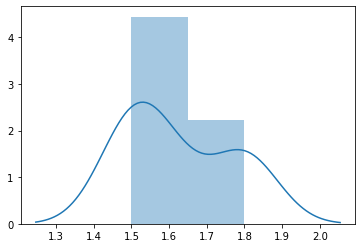

In [39]:
from seaborn import distplot
ax = distplot(data)

## Range
Range dalam suatu dataset ialah angka tertinggi dan angka terendah dalam dataset.

In [44]:
print("Range", dc.values, ", Max:", dc.max(), "Min:", dc.min())

Range [1.5 1.5 1.6 1.5 1.8 1.5 1.8 1.6 1.8] , Max: 1.8 Min: 1.5
Range (Manual): 1.8 1.5


Range dalam built-in python:

In [45]:
print("Range", data, ", Max:", max(data), "Min:", min(data))

Range [1.5, 1.5, 1.6, 1.5, 1.8, 1.5, 1.8, 1.6, 1.8] , Max: 1.8 Min: 1.5


## Quantile

Quantil adalah jarak data yang memisahkan data sekin persen dari yang terkecil hingga tertinggi. Quantil dipisah menjadi:
+ Q1 sebagai Quantil bawah (25%) 
+ Q2 sebagai Quantil tengah (50%)
+ Q3 sebagai Quantil atas (75%)

In [47]:
print("Quantil", dc.values, "Q1:", dc.quantile(0.25), "Q2:", dc.quantile(0.5), "Q3:", dc.quantile(0.75))

Quantil [1.5 1.5 1.6 1.5 1.8 1.5 1.8 1.6 1.8] Q1: 1.5 Q2: 1.6 Q3: 1.8


Quantil bisa dihitung menggunakan `numpy`:

In [50]:
from numpy import quantile
print("Quantil", data, "Q1:", quantile(data, 0.25), "Q2:", dc.quantile(0.5), "Q3:", dc.quantile(0.75))

Quantil [1.5, 1.5, 1.6, 1.5, 1.8, 1.5, 1.8, 1.6, 1.8] Q1: 1.5 Q2: 1.6 Q3: 1.8


## Variance

In [55]:
print("Variansi", dc.values, "=", dc.var())

Variansi [1.5 1.5 1.6 1.5 1.8 1.5 1.8 1.6 1.8] = 0.01944444444444445


In [54]:
print("Variansi", data, "=", statistics.variance(data))

Variansi [1.5, 1.5, 1.6, 1.5, 1.8, 1.5, 1.8, 1.6, 1.8] = 0.01944444444444445


## Standar Deviasi

In [57]:
print("Standar Deviasi", dc.values, "=", dc.std())

Standar Deviasi [1.5 1.5 1.6 1.5 1.8 1.5 1.8 1.6 1.8] = 0.1394433377556793


In [58]:
print("Variansi", data, "=", statistics.stdev(data))

Variansi [1.5, 1.5, 1.6, 1.5, 1.8, 1.5, 1.8, 1.6, 1.8] = 0.1394433377556793


## Summary

Deskripsi Data set dalam `leaf.csv`:

In [88]:
adf = pd.read_csv('leaf.csv')
adata = [[x, 
    adf[x].mean(), 
    adf[x].median(), 
    adf[x].min(), 
    adf[x].max(),
    adf[x].quantile(0.25),
    adf[x].quantile(0.5), 
    adf[x].quantile(0.75),
    adf[x].skew(),
    adf[x].var(),
    adf[x].std()] 
        for x in adf.columns]

pd.DataFrame(adata, columns=['Nama Kolom', 'Mean', 'Median', 'Min', 'Max', 'Q1', 'Q2', 'Q3', 'Skew', 'Var', 'Std'])

,Nama Kolom,Mean,Median,Min,Max,Q1,Q2,Q3,Skew,Var,Std
0,Class (Species),18.544118,15.000000,1.000000,36.000000,9.000000,15.000000,29.000000,0.006848,1.243786e+02,11.152514
1,Specimen Number,6.282353,6.000000,1.000000,16.000000,3.000000,6.000000,9.000000,0.199752,1.199084e+01,3.462779
2,Eccentricity,0.719854,0.763450,0.117080,0.998710,0.550622,0.763450,0.895097,-0.559982,4.339350e-02,0.208311
3,Aspect Ratio,2.440210,1.570750,1.006600,19.038000,1.211300,1.570750,2.343100,3.325116,6.755023e+00,2.599043
4,Elongation,0.513760,0.501855,0.107610,0.948340,0.349623,0.501855,0.633373,0.337896,3.825269e-02,0.195583
5,Solidity,0.904158,0.948130,0.485490,0.993880,0.890667,0.948130,0.976897,-2.061296,1.314213e-02,0.114639
6,Stochastic Convexity,0.943793,0.992980,0.396490,1.000000,0.966230,0.992980,1.000000,-2.633235,1.323571e-02,0.115047
7,Isoperimetric Factor,0.531234,0.579160,0.078376,0.858160,0.346818,0.579160,0.700712,-0.476601,4.731998e-02,0.217532
8,Maximal Indentation Depth,0.037345,0.023860,0.002837,0.198980,0.009521,0.023860,0.047834,1.707126,1.488024e-03,0.038575
9,Lobedness,0.523845,0.103615,0.001464,7.206200,0.016500,0.103615,0.416433,3.116157,1.080850e+00,1.039639
